In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn scipy matplotlib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# 1. Preparing my data
## a. Upload libraries

In [5]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## b. Upload dataframe with all song features gathered from many genres

In [6]:
final_df = pd.read_csv("https://raw.githubusercontent.com/Esther-Velasco/esther_labs/main/W6/final_music_data.csv", sep=',')
""" Taking a lot at the df to see which columns to drop and to keep:
- in K-Means modelling I only use numerical data
- evaluate which features are more relevant to help my model be more powerful
"""
final_df.head(5)

,Unnamed: 0.1,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,<!DOCTYPE html>
0,0,0.0,0.666,0.400,9.0,-7.324,0.0,0.0328,0.7170,0.000334,...,0.395,98.781,audio_features,6I8EbSSjimK98wiDCMtnBQ,spotify:track:6I8EbSSjimK98wiDCMtnBQ,https://api.spotify.com/v1/tracks/6I8EbSSjimK9...,https://api.spotify.com/v1/audio-analysis/6I8E...,285507.0,3.0,NaN
1,1,1.0,0.488,0.449,7.0,-10.793,0.0,0.0438,0.0169,0.019000,...,0.569,141.897,audio_features,1WVh4LQBjRhooTIYmMpAu4,spotify:track:1WVh4LQBjRhooTIYmMpAu4,https://api.spotify.com/v1/tracks/1WVh4LQBjRho...,https://api.spotify.com/v1/audio-analysis/1WVh...,322027.0,3.0,NaN
2,2,2.0,0.487,0.538,5.0,-7.429,0.0,0.0397,0.3300,0.006090,...,0.269,118.039,audio_features,2glwN5raCeEn0EdjKrNw6i,spotify:track:2glwN5raCeEn0EdjKrNw6i,https://api.spotify.com/v1/tracks/2glwN5raCeEn...,https://api.spotify.com/v1/audio-analysis/2glw...,456947.0,3.0,NaN
3,3,3.0,0.547,0.460,11.0,-8.759,0.0,0.0256,0.3440,0.442000,...,0.543,90.768,audio_features,4NQfrmGs9iQXVQI9IpRhjM,spotify:track:4NQfrmGs9iQXVQI9IpRhjM,https://api.spotify.com/v1/tracks/4NQfrmGs9iQX...,https://api.spotify.com/v1/audio-analysis/4NQf...,324733.0,4.0,NaN
4,4,4.0,0.383,0.480,7.0,-8.572,0.0,0.0360,0.0472,0.596000,...,0.274,129.183,audio_features,3oY4WcOoKQLcm3vdiGDx43,spotify:track:3oY4WcOoKQLcm3vdiGDx43,https://api.spotify.com/v1/tracks/3oY4WcOoKQLc...,https://api.spotify.com/v1/audio-analysis/3oY4...,263523.0,3.0,NaN


### I need to have one DF with the ids for the program recommendations later on

In [7]:
final_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', '<!DOCTYPE html>'],
      dtype='object')

In [8]:
ids_df = final_df.drop(columns=['<!DOCTYPE html>', 'time_signature', 'duration_ms',
                       'analysis_url', 'track_href', 'uri',
                       'type', 'tempo',
                       'mode','key', 'Unnamed: 0',
                       'Unnamed: 0.1'])
ids_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'id'],
      dtype='object')

In [9]:
# Count the number of null values in each column- and how many??
ids_df.isna().sum()

danceability        2004
energy              2004
loudness            2004
speechiness         2004
acousticness        2004
instrumentalness    2004
liveness            2004
valence             2004
id                  2004
dtype: int64

In [10]:
ids_df.dropna(inplace=True)
ids_df.reset_index(drop=True, inplace=True)
ids_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,id
0,0.666,0.400,-7.324,0.0328,0.717000,0.000334,0.3420,0.395,6I8EbSSjimK98wiDCMtnBQ
1,0.488,0.449,-10.793,0.0438,0.016900,0.019000,0.2690,0.569,1WVh4LQBjRhooTIYmMpAu4
2,0.487,0.538,-7.429,0.0397,0.330000,0.006090,0.1030,0.269,2glwN5raCeEn0EdjKrNw6i
3,0.547,0.460,-8.759,0.0256,0.344000,0.442000,0.0983,0.543,4NQfrmGs9iQXVQI9IpRhjM
4,0.383,0.480,-8.572,0.0360,0.047200,0.596000,0.3630,0.274,3oY4WcOoKQLcm3vdiGDx43
...,...,...,...,...,...,...,...,...,...
5230,0.505,0.833,-4.632,0.0475,0.007720,0.000079,0.0690,0.565,5lN1EH25gdiqT1SFALMAq1
5231,0.458,0.895,-3.972,0.0681,0.000219,0.000394,0.1060,0.357,5u6fnmRO5V0PTl5M2Eekeu
5232,0.228,0.872,-5.479,0.0648,0.006720,0.000000,0.2420,0.278,4QwcuKjGjtl5fZe7kDdULV
5233,0.329,0.676,-9.036,0.0324,0.036600,0.000000,0.1800,0.529,7iEVmnzJr1V7duYKPWplzp


save this df with ids in a csv

In [11]:
ids_df.to_csv("with_ids.csv")

#### Droping columns and keeping relevant numerical data

In [12]:
""" Firstly, we select the columns we want to cluster by, those which are relevant to the grouping criteria. 
In this case, we are going to select acousticness, danceability, energy, instrumentalness, liveness, loudness, 
speechiness and valence. """

final_final_df = ids_df.drop(columns=['id'])

In [13]:
final_final_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.666,0.400,-7.324,0.0328,0.717000,0.000334,0.3420,0.395
1,0.488,0.449,-10.793,0.0438,0.016900,0.019000,0.2690,0.569
2,0.487,0.538,-7.429,0.0397,0.330000,0.006090,0.1030,0.269
3,0.547,0.460,-8.759,0.0256,0.344000,0.442000,0.0983,0.543
4,0.383,0.480,-8.572,0.0360,0.047200,0.596000,0.3630,0.274
...,...,...,...,...,...,...,...,...
5230,0.505,0.833,-4.632,0.0475,0.007720,0.000079,0.0690,0.565
5231,0.458,0.895,-3.972,0.0681,0.000219,0.000394,0.1060,0.357
5232,0.228,0.872,-5.479,0.0648,0.006720,0.000000,0.2420,0.278
5233,0.329,0.676,-9.036,0.0324,0.036600,0.000000,0.1800,0.529


Saving this one for the model.

In [14]:
final_final_df.to_csv("cleaned_audiofeatures.csv")

# 2. Scale data: first .fit(), then .transform()
#### Check scale of values to get an idea of the dimensions

In [15]:
#checking the scale of our min and max values to understand how big are the values we are talking about.
final_final_df.describe()
#loudness has quite a deviating min value compared to the rest, but overall quite homogeneous data.

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,0.639687,0.696565,-6.814986,0.081382,0.209050,0.060800,0.183742,0.579101
std,0.157264,0.220675,4.198788,0.073938,0.271471,0.190868,0.144393,0.231803
min,0.071400,0.003280,-38.915000,0.023100,0.000003,0.000000,0.011300,0.033200
25%,0.540000,0.593000,-8.277000,0.037600,0.019500,0.000000,0.089700,0.402000
50%,0.663000,0.753000,-5.747000,0.053400,0.086100,0.000016,0.127000,0.602000
75%,0.754000,0.861000,-4.107000,0.090800,0.279000,0.002090,0.247500,0.765000
max,0.979000,0.997000,0.076000,0.777000,0.995000,0.985000,0.988000,0.983000


#### Apply scaler

In [16]:
scaler = StandardScaler()  #or MinMaxScaler() as well
scaler.fit(final_final_df)   #here fit() calculates the mean and std
final_scaled = scaler.transform(final_final_df)
scaled_df = pd.DataFrame(final_scaled, columns = final_final_df.columns)
#display(.head())
print()
display(scaled_df.head())

#now we check variables dimensions and it looks better!

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.167332,-1.344025,-0.121240,-0.657126,1.871279,-0.316824,1.096127,-0.794287
1,-0.964633,-1.121958,-0.947510,-0.508339,-0.707877,-0.219019,0.590513,-0.043579
2,-0.970993,-0.718612,-0.146250,-0.563796,0.445578,-0.286664,-0.559240,-1.337904
3,-0.589431,-1.072106,-0.463038,-0.754514,0.497154,1.997385,-0.591794,-0.155753
4,-1.632366,-0.981467,-0.418497,-0.613843,-0.596252,2.804303,1.241578,-1.316332


In [17]:
scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
count,5.235000e+03,5.235000e+03,5.235000e+03,5.235000e+03,5.235000e+03,5.235000e+03,5.235000e+03,5.235000e+03
mean,2.388835e-16,-4.126170e-16,-4.343337e-17,-2.171668e-17,8.686673e-17,-5.972088e-17,-6.922193e-17,1.085834e-16
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-3.613941e+00,-3.141952e+00,-7.645798e+00,-7.883295e-01,-7.701245e-01,-3.185738e-01,-1.194375e+00,-2.355244e+00
25%,-6.339468e-01,-4.693530e-01,-3.482323e-01,-5.922011e-01,-6.982986e-01,-3.185738e-01,-6.513592e-01,-7.640865e-01
50%,1.482540e-01,2.557636e-01,2.543802e-01,-3.784888e-01,-4.529454e-01,-3.184884e-01,-3.930111e-01,9.879722e-02
75%,7.269555e-01,7.452173e-01,6.450065e-01,1.273871e-01,2.576949e-01,-3.076227e-01,4.415988e-01,8.020475e-01
max,2.157811e+00,1.361566e+00,1.641342e+00,9.408994e+00,2.895427e+00,4.842557e+00,5.570467e+00,1.742591e+00


#### I save my scaler in a pickle for the future since I will need to scale the input songs´audio features as well

In [18]:

def save(scaler, filename = "scaler_model_songrecommender.pickle"): 
    with open(filename, "wb") as f:
        pickle.dump(scaler, f)


#To restore the picke later in the program I will have to use:
"""
def load(filename = “filename.pickle”): 
try: 
with open(filename, "rb") as f: 
return pickle.load(f) 
except FileNotFoundError: 
print(“File not found!”) 
"""

'\ndef load(filename = “filename.pickle”): \ntry: \nwith open(filename, "rb") as f: \nreturn pickle.load(f) \nexcept FileNotFoundError: \nprint(“File not found!”) \n'

In [19]:
save(scaler,"scaler_model_songrecommender.pickle")

# 3. Clustering
#### First use a random number, then refine once model is done though elbow or silhouette techniques
#### Although I know I added around 16 styles

In [20]:
#imported from sklearn.cluster
#I chose a random number of clusters
kmeans = KMeans(n_clusters=20, random_state=1234)
kmeans.fit(scaled_df)  #here is magic happens, now i have my kmeans model

/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=20, random_state=1234)

In [21]:
#for each datapoint I am getting the following cluster value
labels = kmeans.labels_
#the number of clusters: I have 8 from 0 to 8
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

#### Finishing my model

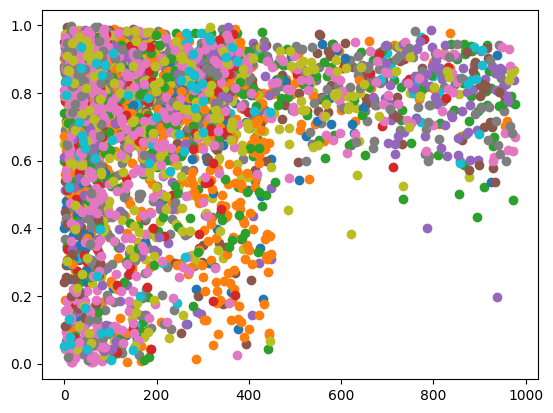

In [22]:
#FOR RANDOM FEATURES:
# assign a cluster to each example
labels = kmeans.predict(scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(final_df.to_numpy()[row_ix, 1], final_df.to_numpy()[row_ix, 3])
    # show the plot
plt.show()

# 4. Refining the model

#### Get the clusters and how many observations each cluster has.

In [23]:
clusters = kmeans.predict(scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0      69
1     468
2     343
3     182
4     179
5     288
6      83
7     713
8     455
9      69
10    284
11    332
12    332
13    139
14    213
15     94
16    569
17     97
18    229
19     97
Name: count, dtype: int64

#### I create a column in the DF with clusters


In [24]:
clustered_df = pd.DataFrame(final_final_df)
final_final_df["cluster"] = clusters

Parameters : silhouette and elbow methods

In [25]:
kmeans.inertia_

10901.568897592275

In [38]:
#initialization method(algorithm), can be random, can be k-means++ which is the best to pick initial centroids. It was discovered in 2007. 
kmeans2 = KMeans(n_clusters=15,
                init="k-means++", 
                n_init=20,  # how many times it should initalize the centroids, and then pick one. Try with 1, 4, 8, 20, 30, 100... By default its 10. Alex does not recommend going to 50, 100.
                max_iter=1,
                tol=0,
                algorithm="elkan", 
                random_state=1234) #the first centriod is picked at random
kmeans2.fit(scaled_df)
print(kmeans2.inertia_)

13281.48358111743


#### Trying elbow method to cluster definition

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 8 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 9 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 16 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 17 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 18 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 19 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 20 clusters! 



/Users/esthervelasco/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

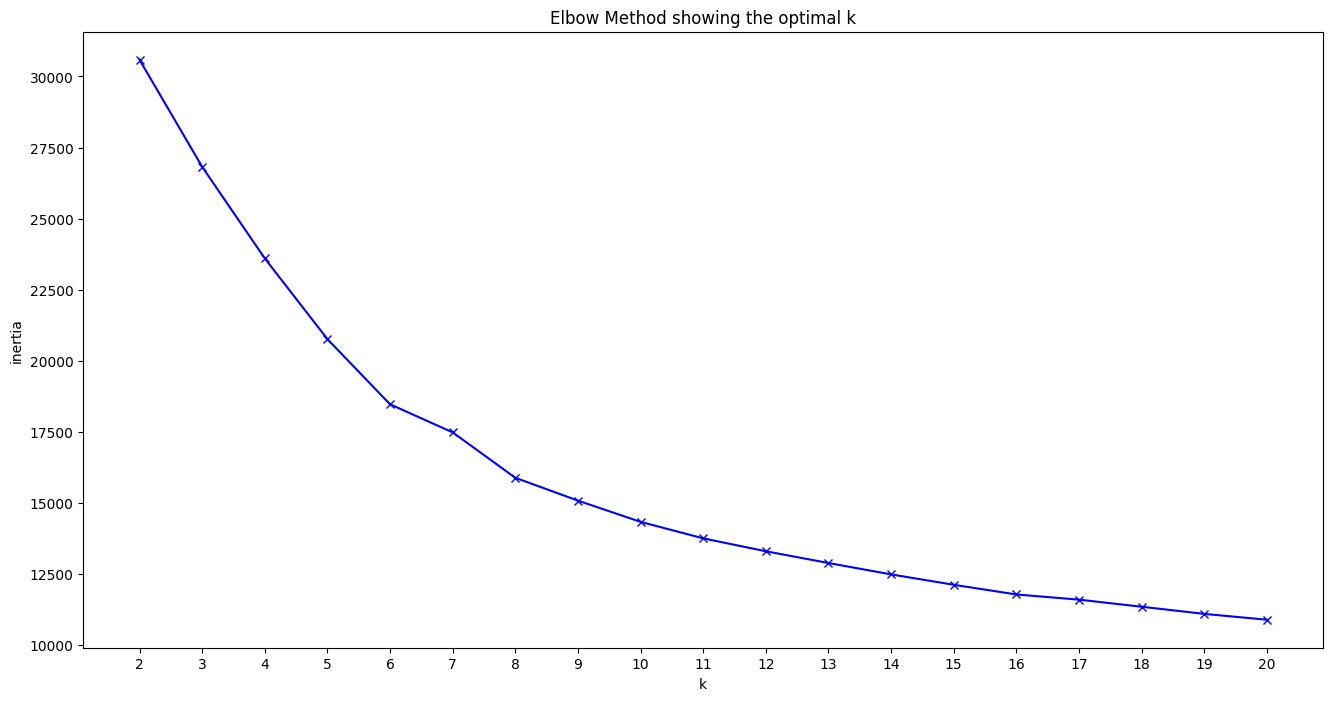

In [27]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)  #append error to inertia list

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [28]:
#My elbow sets both 6 and 8 as potential cluster values, let´s see the silhouette

#### Trying silhouette method to cluster definition

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

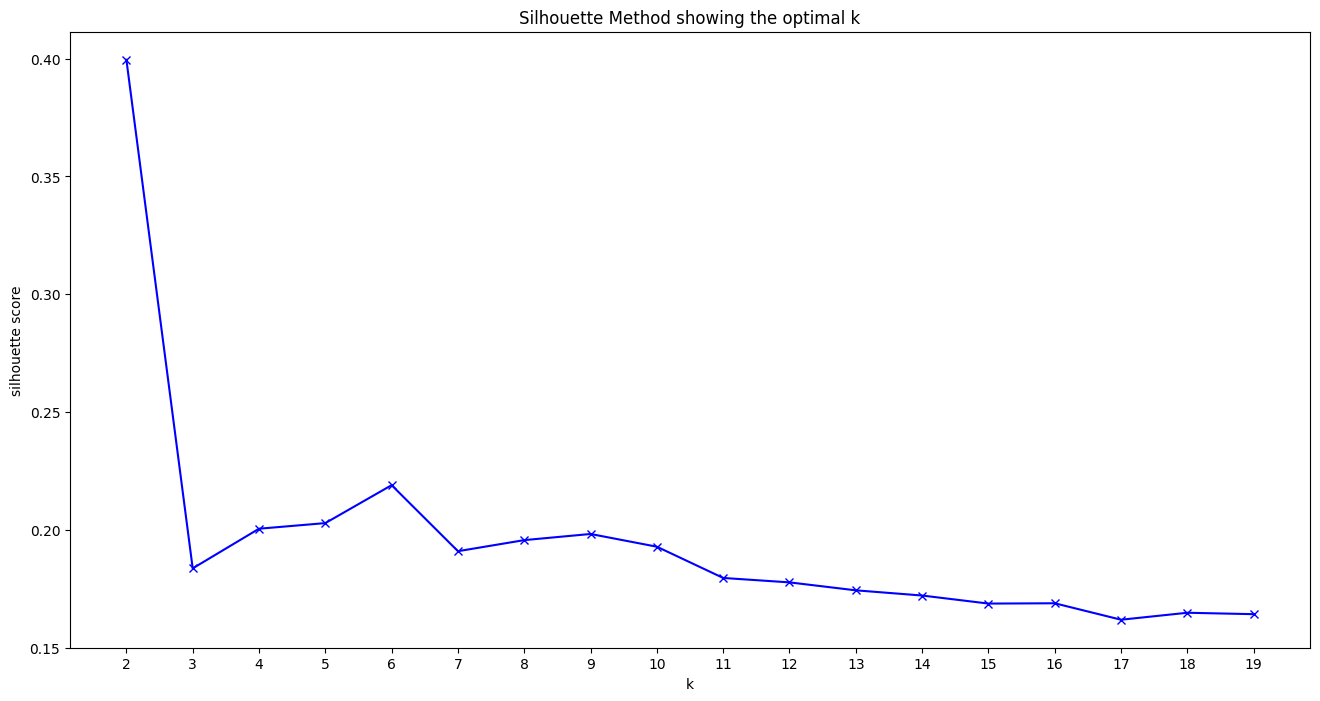

In [29]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(scaled_df, kmeans.predict(scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

#### I can see in the silhouette a bit of a higher value in number 16 

# 5. Saving my model in pickle

In [30]:
def load(filename = "ModelSongRecommender.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [39]:
save(kmeans2,"ModelSongRecommender.pickle")

In [32]:
""" Saved above as:
def save(scaler, filename = "scaler_model_songrecommender.pickle"): 
    with open(filename, "wb") as f:
        pickle.dump(scaler, f)
"""

' Saved above as:\ndef save(scaler, filename = "scaler_model_songrecommender.pickle"): \n    with open(filename, "wb") as f:\n        pickle.dump(scaler, f)\n'

#### Save df in csv with new cluster column to use in my program

In [33]:
clustered_df= final_final_df.to_csv("clustered_audiofeatures.csv")
final_final_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,cluster
0,0.666,0.400,-7.324,0.0328,0.717000,0.000334,0.3420,0.395,10
1,0.488,0.449,-10.793,0.0438,0.016900,0.019000,0.2690,0.569,5
2,0.487,0.538,-7.429,0.0397,0.330000,0.006090,0.1030,0.269,5
3,0.547,0.460,-8.759,0.0256,0.344000,0.442000,0.0983,0.543,0
4,0.383,0.480,-8.572,0.0360,0.047200,0.596000,0.3630,0.274,0
...,...,...,...,...,...,...,...,...,...
5230,0.505,0.833,-4.632,0.0475,0.007720,0.000079,0.0690,0.565,8
5231,0.458,0.895,-3.972,0.0681,0.000219,0.000394,0.1060,0.357,11
5232,0.228,0.872,-5.479,0.0648,0.006720,0.000000,0.2420,0.278,11
5233,0.329,0.676,-9.036,0.0324,0.036600,0.000000,0.1800,0.529,11
